# Step 1: Import the Required Libraries
This is the start of any python work, import the libraries to prepare your workspace and call the methods.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Step 2: Read and Explore the Data
The second step of this work is to define and access the data directory and present the data into this notebook. Usually we present the head of the data which show the 5 initial rows across all the columns. That can help to see how the data looks like at the beginning at least.

In [65]:
df = pd.read_csv("day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 3 (A): Data Description.
This part can describe the data from statistical point of view, to show some important matrices such as mean, standard deviation, and quartiles.

In [66]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 3 (B): Number of Features and instances.
Using shape, we can report data shape in terms of length and width. This can report the number of columns (or what we can call features or variables) along with the number of observations (that we can call rows or instances)

In [67]:
# Checking the Shape of Dataframe
df.shape

(730, 16)

# Step 3 (C): Type of Data.
Using info, we can get information about all the data columns or features in term of the type of data in each column.

In [68]:
# Checking the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 3 (C): Check Empty Values.
Using isnull, we can ensure if the data features have any sort of NAs or not. This is an important step in machine learning to ensure that the algorithm gets all the information required to define pattern in the data.As can be observed below, the data is 100% complete and there is no single missing values across data features (columns).

In [69]:
# Checking the Null Values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step 3 (D): Mapping of Features.
This step can help us to understand some of the data features and values, especially in the description and visualization stage. I am using the data dictionary provided by UpGrad to subsitute some of the veariables with their corresponding description, such as mapping the season feature using 'Spring', 'Summer' 'Fall', and 'Winter'. Also mapping the month column or feature using month's name such as 'Jan', 'Feb', 'Mar', so on so forth. This is going to be applied to the weathersit column as well as weekday column.


In [70]:
df['season']=df.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

# Step 3 (E): Remove Unimportant Features (Columns).
In this step, I am going to get rid of the unimportant features or columns since columns not going to be included in the analysis or model development stages. Some columns like record index, date, and type of users whether casual or registered appear to be unimportant, especially the number of users renting bikes are reported in the 'count' or total rental bikes, which is going to be the target of the model. I am going to call 'head' method again to double check the removal of the unwanted features.

In [71]:
df.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace=True)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


# Step 4: Visualising the Data
In this section, I am going to visualize the data features in order to observe differences. This can provide a deeper view of the features and their components. Initially, I am going to visualize categorical variables using boxplot method to plot variables against the target, which is 'cnt' feature or column. Then, I am going to visualise the numerical features using pairplot and heatmap to examin the correclation among data features.

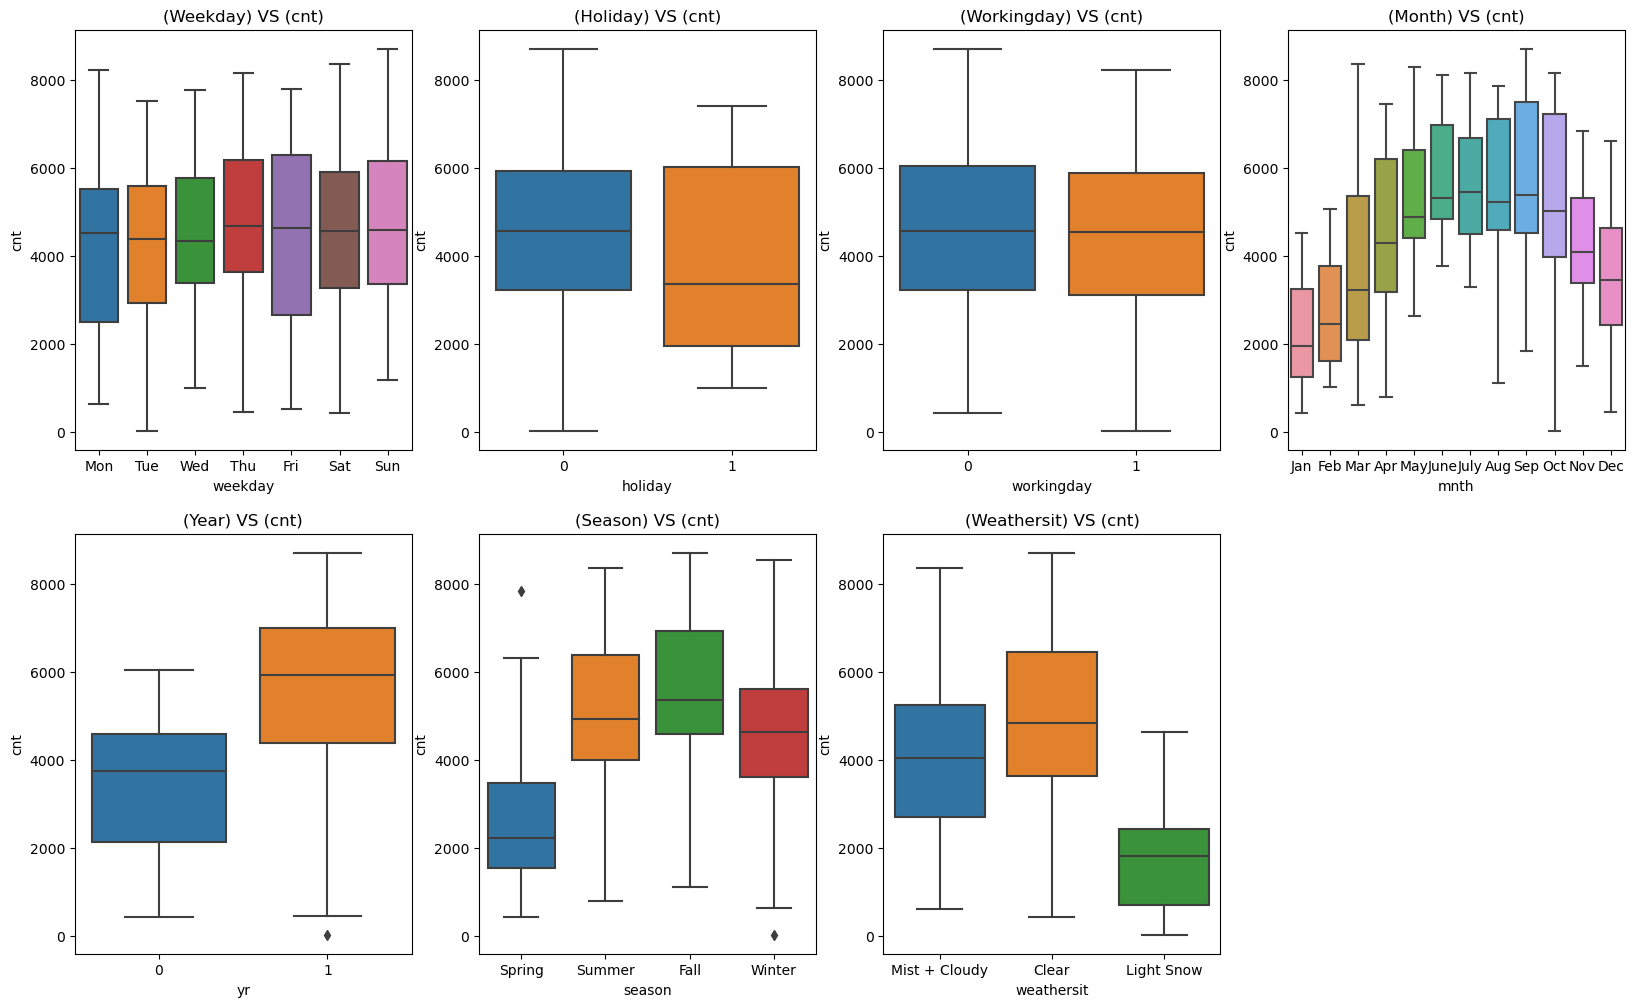

In [72]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.title('(Weekday) VS (cnt)')
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.title('(Holiday) VS (cnt)')
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.title('(Workingday) VS (cnt)')
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.title('(Month) VS (cnt)')
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.title('(Year) VS (cnt)')
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.title('(Season) VS (cnt)')
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.title('(Weathersit) VS (cnt)')
plt.show()

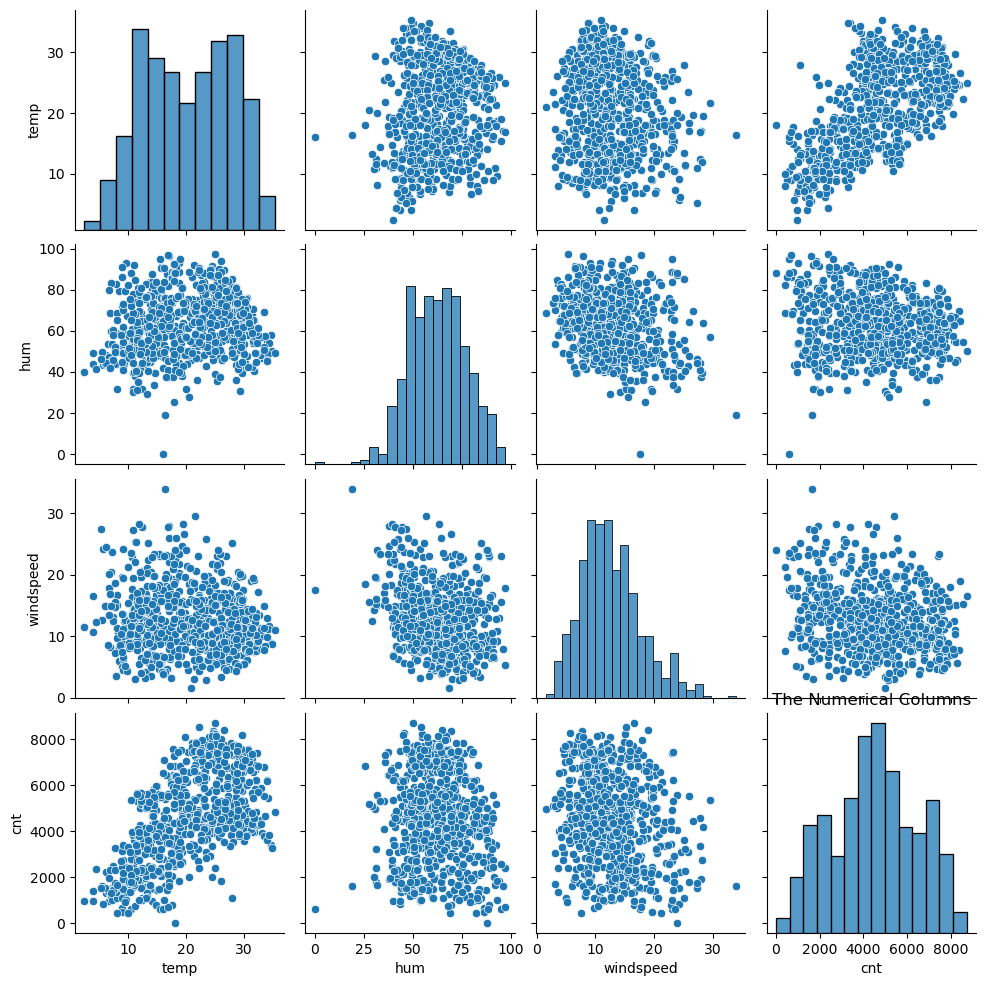

In [73]:
sns.pairplot(data=df,vars=['temp','hum','windspeed','cnt'])
plt.title('The Numerical Columns')
plt.show()

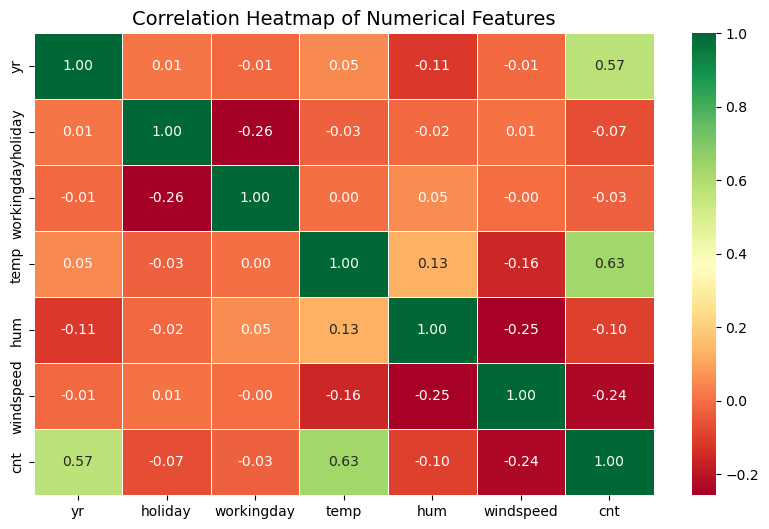

In [74]:
selected_columns = ["yr", "holiday", "workingday", "temp", "hum", "windspeed", "cnt"]
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap="RdYlGn", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

------------------------------------------------------------------------------------------
##### Note: Since variables like temp and yr are showing strong correlations with cnt, we can justify building a linear regression model to explore their predictive influence

-------------------------------------------------------------------------------------------

# Step 5: Data Manipulation and Preparation
In this step, I am prepreaing the dataset for the model development step, in which I am going to do mapping for categorical variables and inject dummy representation of variables like (month), (weekday), (weathersit) and (seasons). Then I am going to drop these variables from the dataset.

In [75]:
# Dummy representation.
month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)

In [76]:
# Add the dummy representation to the dataset
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,False,False,False,False,False,False,True,True,False,False
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,False,False,False,True,False,False,True,True,False,False
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,False,True,False,False,True,False,False
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,...,False,False,True,False,False,False,False,True,False,False
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,False,False,False,True,False,False


In [77]:
# Dropping variables
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
0,0,0,1,14.110847,80.5833,10.749882,985,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,0,0,1,14.902598,69.6087,16.652113,801,False,False,False,...,False,False,False,True,False,False,True,True,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [78]:
# Checking the Shape of Dataframe after Data Preparation is done.
df.shape

(730, 29)

In [79]:
# Checking the Info about Columns after Data Preparation is done.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    bool   
 8   Dec            730 non-null    bool   
 9   Feb            730 non-null    bool   
 10  Jan            730 non-null    bool   
 11  July           730 non-null    bool   
 12  June           730 non-null    bool   
 13  Mar            730 non-null    bool   
 14  May            730 non-null    bool   
 15  Nov            730 non-null    bool   
 16  Oct            730 non-null    bool   
 17  Sep            730 non-null    bool   
 18  Mon       

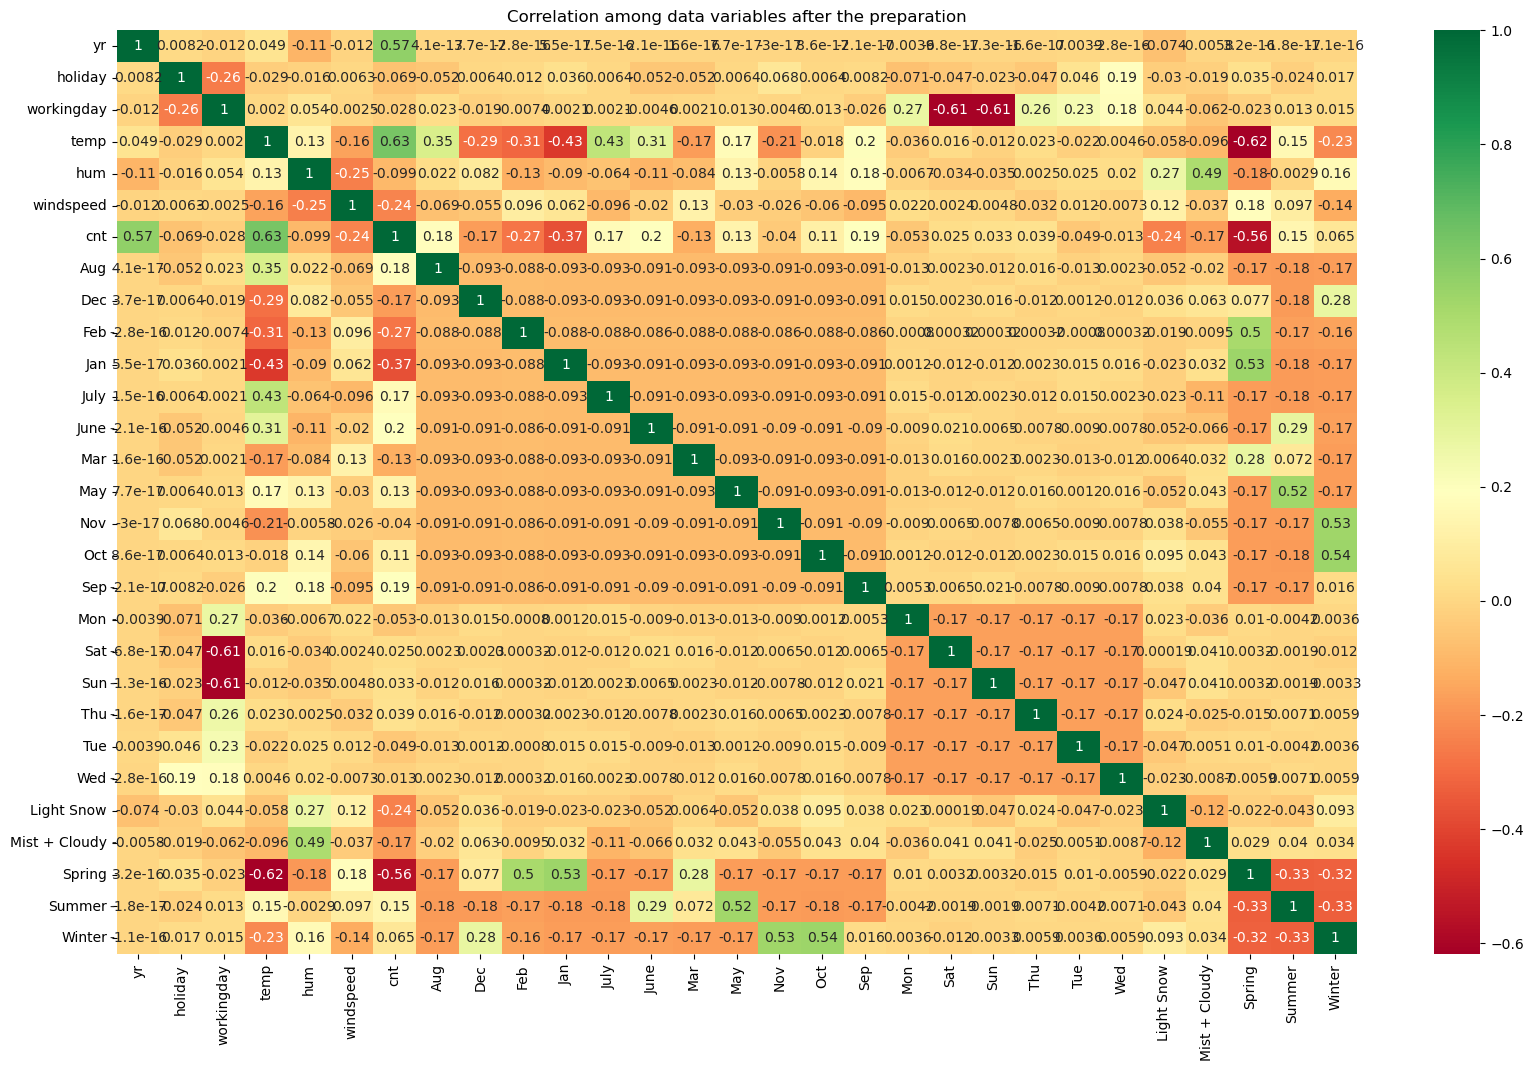

In [80]:
# Plot Heatmap to present the Correlation among the full set of data varibales.
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)
plt.title('Correlation among data variables after the preparation')
plt.show()

# Step 6: Preparing the Data for Model Training
In This step, I am going to split the dataset into training and testing sets. This is important to ensure that the model is going to develop correctly. Also, MinMaxScaler method is going to be used to rescale variables such as hum, temp, windspeed, and cnt. 

In [81]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [82]:
df_train.shape

(510, 29)

In [83]:
df_test.shape

(220, 29)

In [84]:
# Rescaling the Variables like (hum), (temp), (windspeed), (cnt) as they have large values Using MinMaxScaler. 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])
df_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,False,False,False,...,False,True,False,False,False,False,True,True,False,False
728,1,0,1,0.245101,0.498067,0.663106,0.204096,False,True,False,...,False,False,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,False,False,...,False,True,False,False,False,False,True,False,True,False
111,0,0,0,0.345824,0.751824,0.380981,0.191095,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [85]:
# Checking the values of the Train set after performing Scaling.
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


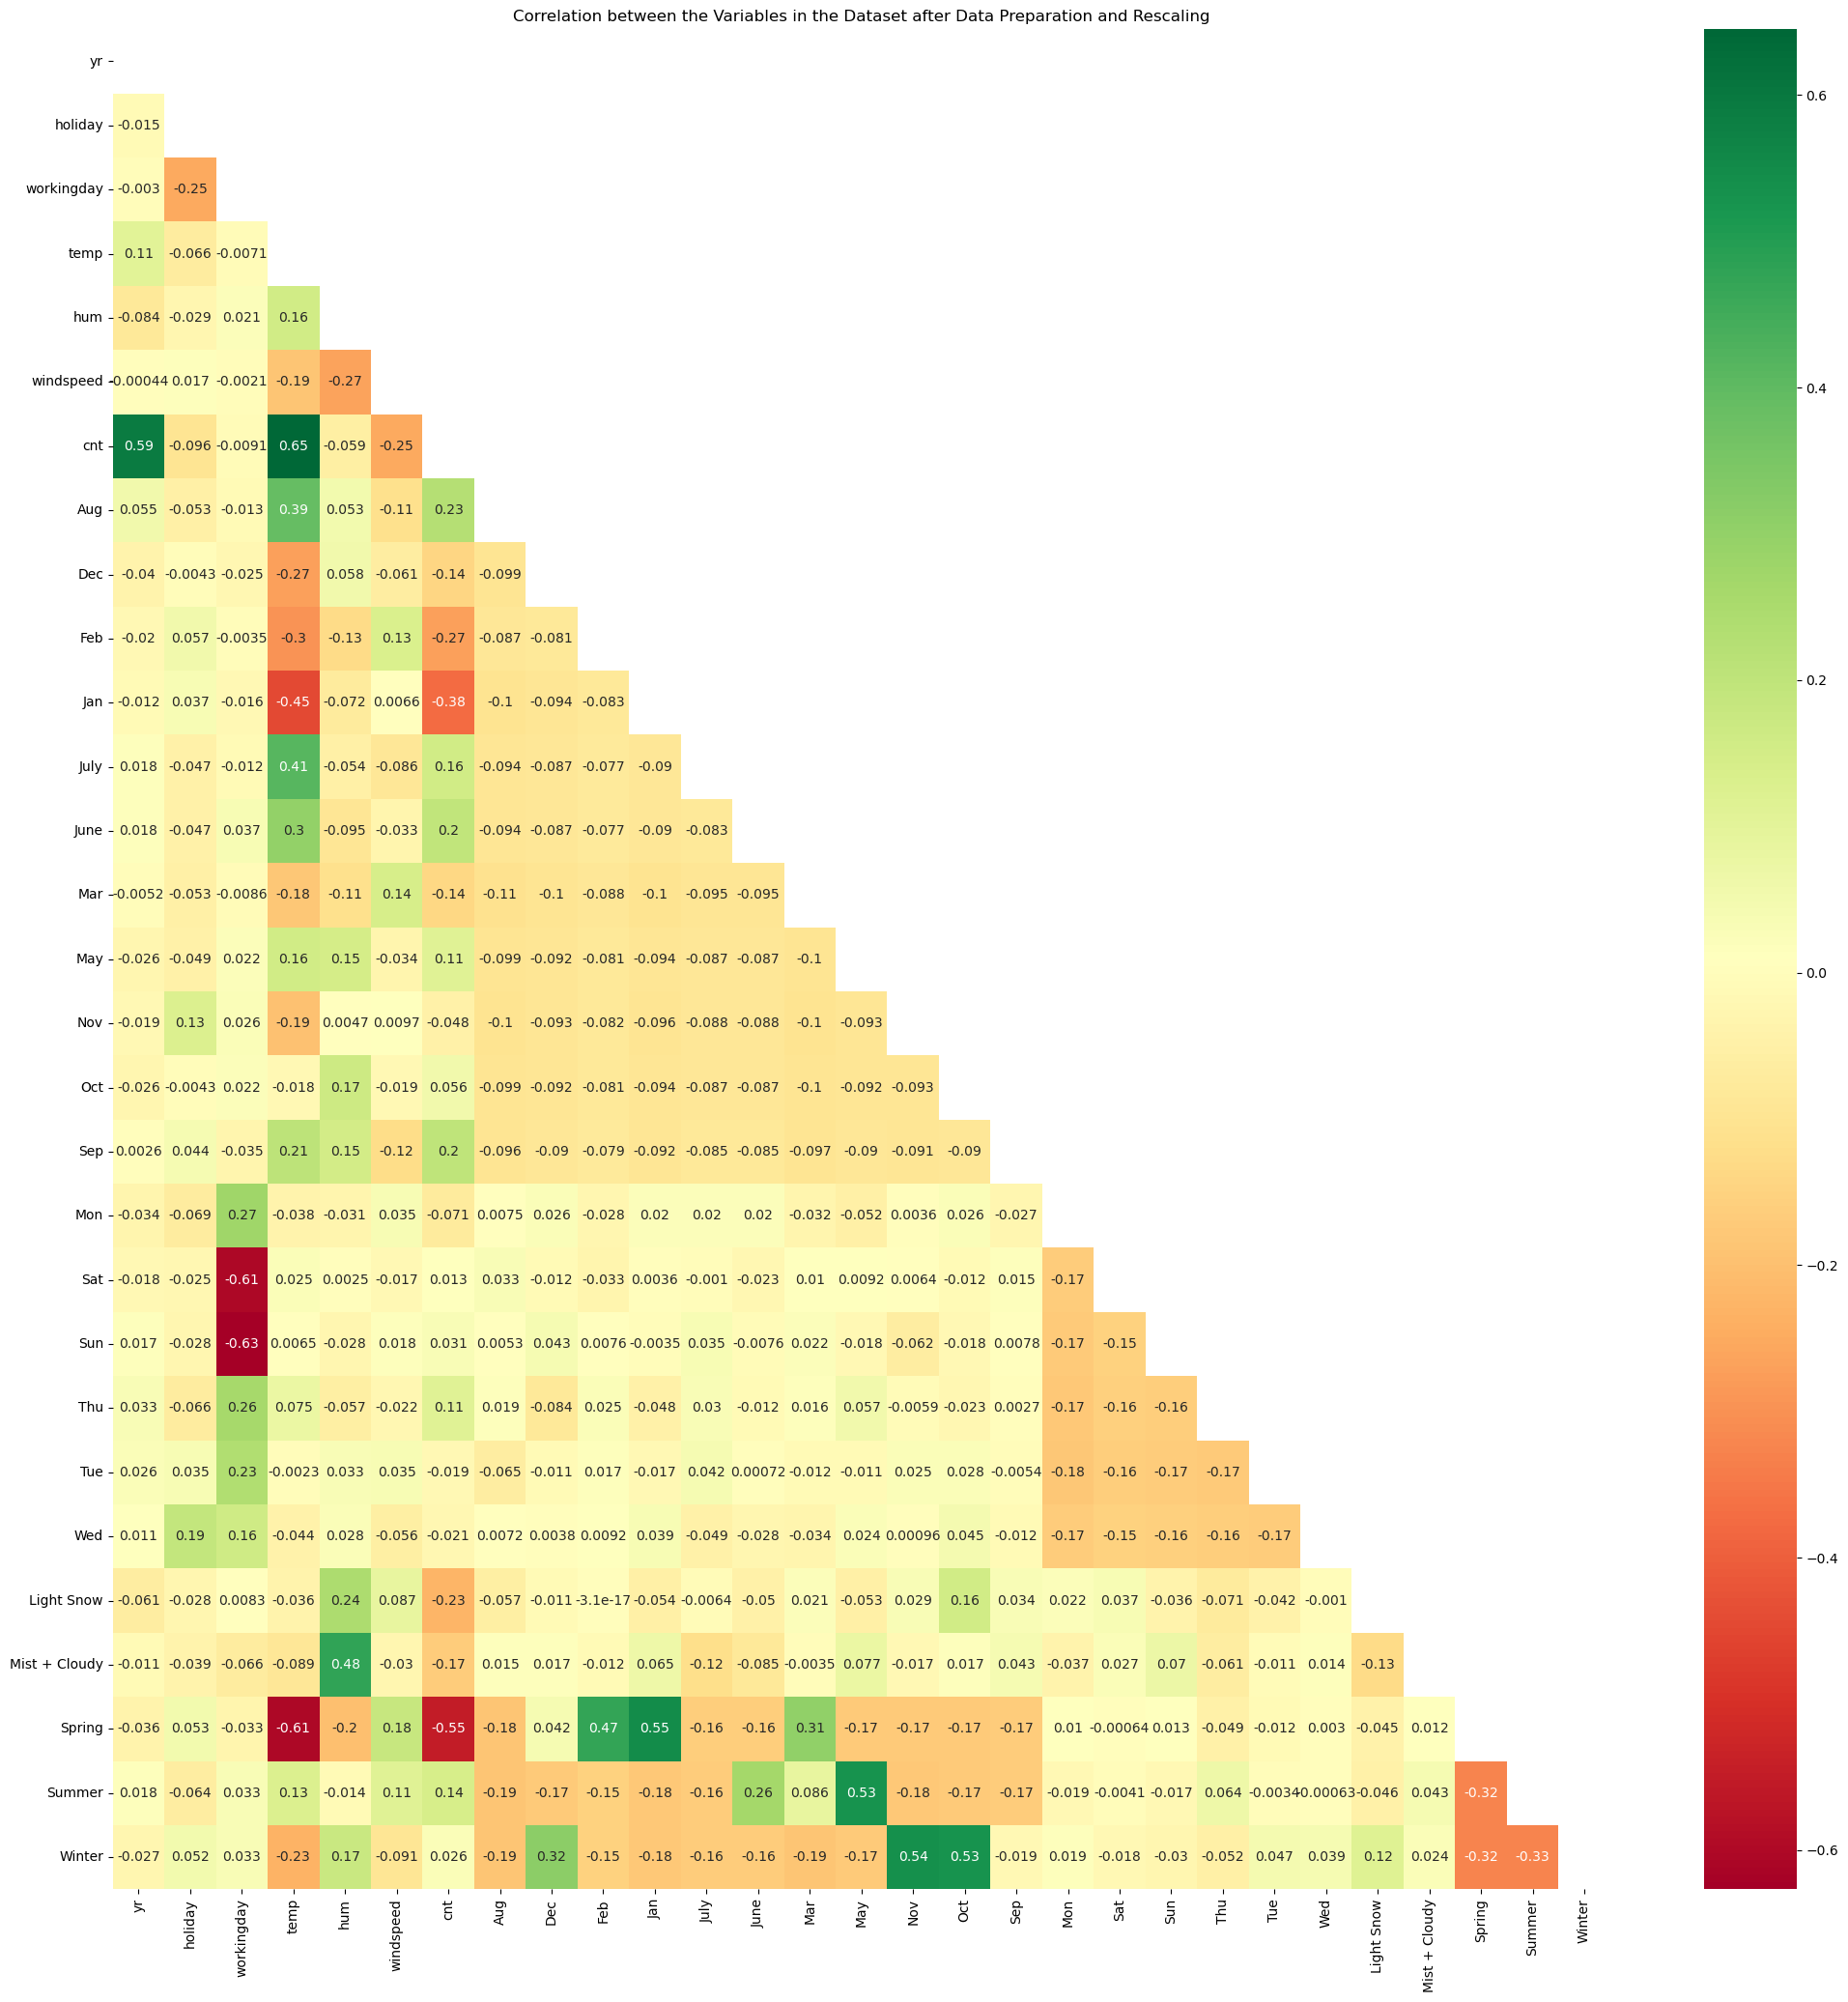

In [86]:
# Making a Heatmap to show the Correlation coefficients to see which variables are highly correlated after the Data Preparation and Rescaling.
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title('Correlation between the Variables in the Dataset after Data Preparation and Rescaling')
plt.show()

We see (cnt) have correlation with (year) and (temp). Similarly, (Misty) and (humidity) show correlation, Spring with Jan and Feb and Summer with May and Winter with Oct and Nov show good correlation.

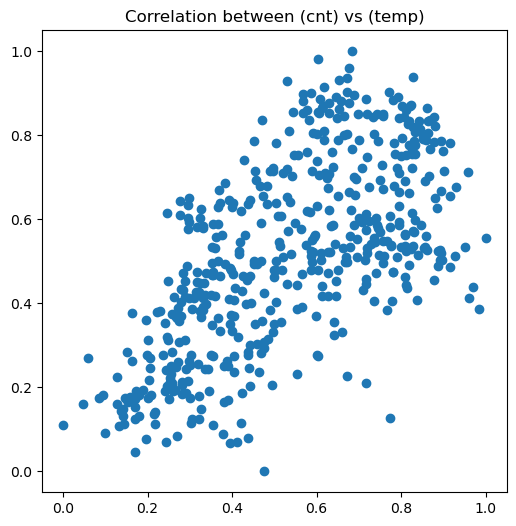

In [87]:
# Visualizing one of the correlation (cnt) and (temp) to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between (cnt) vs (temp)')
plt.show()

Visualization confirms a positive correlation between cnt and temp.

# Step 7: Training the Model
In this section, I am going to develop the model.

In [88]:
# Building the Linear Model.
y_train = df_train.pop('cnt')
X_train = df_train

In [89]:
# Creating the RFE object.
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [90]:
# List the variables that selected in top 15 list.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [91]:
# Selecting the selected variable via RFE in col list.
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'Spring', 'Summer',
       'Winter'],
      dtype='object')


In [92]:
# Checking which columns has been rejected.
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [96]:
# Make a function to calculate VIF of variables.
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [94]:
# Dataframe with RFE selected variables and calculate VIF.
X_train_rfe = X_train[col]
calculateVIF(X_train_rfe)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

We see tha the (humidity) shows high VIF value.

In [95]:
# As (humidity) shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

VIF Values seems to be good now, and we will see if we can reduce further.

# Step 8: Building Linear Regression Model.

In [53]:
# Building the 1st Linear Regression Model.
X_train_lm_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        02:04:48   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618

In [54]:
# We can drop (Nov) variable as it has high (p-value).
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model.
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,Spring,2.89
11,Summer,2.24
0,yr,2.07
12,Winter,2.05
5,Jan,1.65
6,July,1.59
9,Mist + Cloudy,1.57
7,Sep,1.34


In [55]:
# Building the 2nd Linear Regression Model.
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.74e-186
Time:                        02:04:53   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310

In [56]:
# We can drop (Dec) variable as it has high (p-value).
X_train_new = X_train_new.drop(['Dec'], axis = 1)
# Run the function to calculate VIF for the new model.
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,Spring,2.75
10,Summer,2.24
0,yr,2.07
11,Winter,1.78
4,Jan,1.61
5,July,1.59
8,Mist + Cloudy,1.56
6,Sep,1.34


In [57]:
# Building the 3rd Linear Regression Model.
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          8.14e-187
Time:                        02:04:54   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [58]:
# We can drop (Jan) variable as it has high (p-value).
X_train_new = X_train_new.drop(['Jan'], axis = 1)
# Run the function to calculate VIF for the new model.
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,Summer,2.23
8,Spring,2.08
0,yr,2.07
10,Winter,1.78
4,July,1.58
7,Mist + Cloudy,1.55
5,Sep,1.34
6,Light Snow,1.08


In [59]:
# Building the 4th Linear Regression Model.
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          5.06e-187
Time:                        02:04:55   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [60]:
# We can drop (July) variable as it has high (p-value).
X_train_new = X_train_new.drop(['July'], axis = 1)
# Run the function to calculate VIF for the new model.
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,Spring,1.99
8,Summer,1.90
9,Winter,1.63
6,Mist + Cloudy,1.55
4,Sep,1.23
5,Light Snow,1.08
1,holiday,1.04


In [57]:
# Building the 5th Linear Regression Model.
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

NameError: name 'X_train_new' is not defined

##### I can cosider the above model i.e lr_5, as it appears to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant. F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant.

In [56]:
# Checking the Parameters and their Coefficient values
lr_5.params

NameError: name 'lr_5' is not defined

#### It is imperative to mention the following points:

1) Choosing the right model involves looking at a few key factors: p-value, VIF, and R-squared value. The p-value helps us determine if a variable is statistically significant, VIF (Variance Inflation Factor) checks for multicollinearity (how much the variables are correlated with each other), and the R-squared value tells us how well our model explains the variation in the dependent variable. A higher R-squared means our independent variables do a better job predicting the outcome.

2) Since all the selected variables have a p-value below 0.05, we can confidently reject the null hypothesis, meaning these variables significantly impact the dependent variable.

3) The VIF values for all variables are below 5, which means there is no concerning level of multicollinearity, ensuring a more reliable model.

4) Our model achieved an R-squared value of 83.3%, which indicates a strong relationship between the independent variables and cnt (count). This means our chosen variables effectively explain the majority of the variation in count, making the model a good fit. 

# Step 9: Residual Analysis
In this section, I am going to analyse residuals, which can help understanding how accurate is the model.

In [52]:
X_train_lm_5

NameError: name 'X_train_lm_5' is not defined

In [55]:
# Getting the y_train_pred for Residual Analysis.
y_train_pred = lr_5.predict(X_train_lm_5)

NameError: name 'lr_5' is not defined

#### Normality of Error Terms

In [54]:
# Histogram of the Error Terms.
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

NameError: name 'y_train_pred' is not defined

<Figure size 640x480 with 0 Axes>

Error Terms are following a normal distribution.

#### Multi Colinearity

In [66]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,Spring,1.99
8,Summer,1.90
9,Winter,1.63
6,Mist + Cloudy,1.55
4,Sep,1.23
5,Light Snow,1.08
1,holiday,1.04


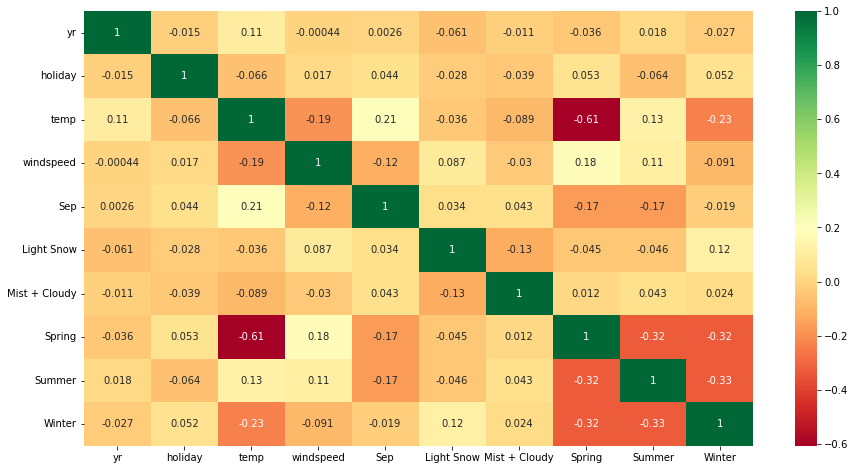

In [67]:
# Making a Heatmap to show the Correlation X Train.
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5, so it's good and there is no multicolinearity are seen from the Heatmap.

#### Linearity 

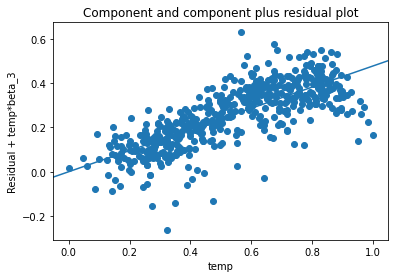

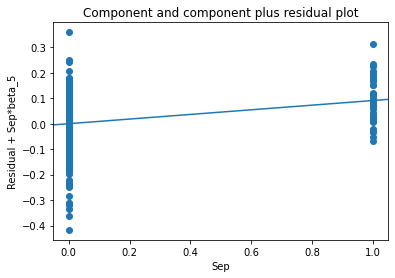

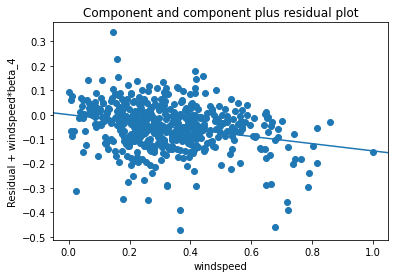

In [68]:
# Linear Relationship Validation Using CCPR plot.
sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()
sm.graphics.plot_ccpr(lr_5, 'Sep')
plt.show()
sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Homoscedasticity

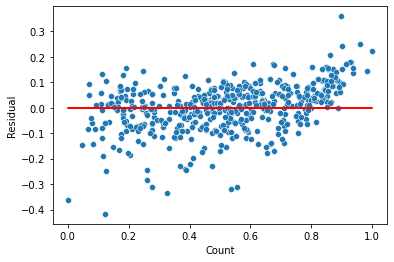

In [69]:
# Making polt for Residuals.
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model lr_5 is 2.085, which signifies there is no autocorrelation.

# Step 10: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, Now we will go ahead and make predictions using the final, i.e. 5th model.

In [72]:
# Applying scaling on the Test Dataset.
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
184,0,1,0,0.307016,1.955914,0.092231,0.692706,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.330605,1.808848,0.158068,0.712034,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.198574,2.517430,0.329011,0.303382,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.323916,1.270063,0.334091,0.547400,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.302087,0.887696,0.521483,0.569029,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [73]:
# Checking the Description of the Columns of the Test Dataset.
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.214427,1.896308,0.309203,0.522154,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.079067,0.462995,0.151153,0.219163,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.040780,0.724590,-0.028085,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.145498,1.556837,0.200800,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.214242,1.856980,0.296732,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.281314,2.225046,0.393904,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.358772,3.029478,0.777276,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
col1 = X_train_new.columns
X_test = X_test[col1]
# Adding constant variable to Test Dataframe.
X_test_lm_5 = sm.add_constant(X_test)

In [76]:
y_pred = lr_5.predict(X_test_lm_5)

In [77]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.123

# Step 11: Model Evaluation

Plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

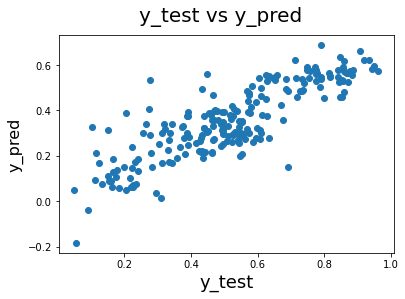

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [79]:
round(lr_5.params,4)

const            0.1909
yr               0.2341
holiday         -0.0963
temp             0.4777
windspeed       -0.1481
Sep              0.0910
Light Snow      -0.2850
Mist + Cloudy   -0.0787
Spring          -0.0554
Summer           0.0621
Winter           0.0945
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [80]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.0811


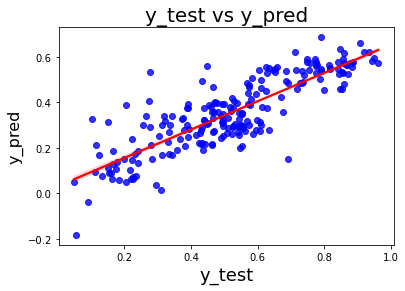

In [81]:
# Visualizing the fit on the Test Data.
# plotting a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.

### Summary:

After analyzing and preparing the data, building and training the model, and evaluating performance, here’s what I have found:

1) The model performed well, with an R-squared value of 82.71% on the training set and 81.13% on the test set. This means the model effectively explains the variation in bike rentals and performs consistently across different datasets.

2) The mean squared error (MSE) is close to zero for both the training and test sets, indicating that the model is making highly accurate predictions. I have used p-values and Variance Inflation Factor (VIF) to identify the most significant variables, ensuring that only the most relevant factors were included. Additionally, Recursive Feature Elimination (RFE) was performed for automated variable selection.

3) Temperature and working days significantly impact bike rental demand. Interestingly, bike rentals were higher in winter than in summer and spring, with September and October seeing peak demand. Certain days of the week (Wednesday, Thursday, and Saturday) and holidays also had a noticeable increase in rentals.

4) To boost rentals during summer and spring, targeted marketing campaigns should be implemented. Since demand was lower in the first half of the year, an aggressive marketing strategy during these months could help increase rentals. Incentives or promotional deals could be introduced on days with bad weather to encourage more rentals. Rentals increased in 2019 compared to 2018, suggesting a growing market. Efforts should be made to retain repeat customers through loyalty programs or personalized offers.

These insights provide valuable direction for optimizing bike rental strategies and improving customer engagement.